# Pylint and Radon on all Code Blocks

In [1]:
import sqlite3
import pandas as pd
import os

from helpers.make_latex_table import create_latex_tables
#
# db_path = "../../giicg.db"
# if not os.path.exists(db_path):
#     raise FileNotFoundError(f"Database file does not exist: {db_path}")
#
# conn = sqlite3.connect(db_path)
# query = """
# SELECT
#     c.*,
#     m.conversation_id, m.message_id,
#     u.user_id, u.gender, u.work_exp_years, u.age,
#     conv.llm_version, conv.satisfaction, conv.rated_complexity
# FROM code_blocks c
# JOIN messages m ON c.message_id = m.message_id
# JOIN conversations conv ON m.conversation_id = conv.conversation_id
# JOIN users u ON conv.user_id = u.user_id
# """
#
# code_blocks = pd.read_sql(query, conn)
#
# code_blocks = code_blocks.dropna(subset=['code_text'])
# code_blocks = code_blocks[code_blocks['code_text'].str.strip() != '']
# code_blocks = code_blocks.dropna(subset=['code_text'])
# code_blocks = code_blocks[(code_blocks['gender'] == 'Woman (cisgender)') | (code_blocks['gender'] == 'Man (cisgender)')]
# code_blocks = code_blocks[(code_blocks['language'] == 'python')]
# code_blocks = code_blocks.drop_duplicates(subset=['code_text'])
# code_blocks = code_blocks.loc[:, ~code_blocks.columns.duplicated()]
#
#
# code_blocks

## Compute Scores and save to DB

In [18]:
# num_code_blocks = code_blocks.groupby('user_id').count().reset_index()
# num_code_blocks

,user_id,code_block_id,message_id,code_text,language,conversation_id,gender,work_exp_years,age,llm_version,satisfaction,rated_complexity
0,6,16,16,16,16,16,16,16,16,0,16,16
1,8,2,2,2,2,2,2,2,2,2,2,2
2,11,18,18,18,18,18,18,18,18,0,18,18
3,16,35,35,35,35,35,35,0,35,0,35,35
4,28,43,43,43,43,43,43,43,43,43,43,43
5,31,1,1,1,1,1,1,1,1,1,1,1
6,34,72,72,72,72,72,72,72,72,72,72,72
7,46,8,8,8,8,8,8,8,8,8,8,8
8,48,10,10,10,10,10,10,0,10,10,10,10
9,55,69,69,69,69,69,69,69,69,69,69,69


### Subsample from user 73

In [19]:
# def subsample_code_blocks(df, user_id, n=50):
#     """Subsample up to n code blocks from the specified user, keep all others."""
#     # Separate the code blocks for the target user
#     user_blocks = df[df['user_id'] == user_id]
#     other_blocks = df[df['user_id'] != user_id]
#
#     # Subsample n code blocks for the target user (if < n rows, use all)
#     sample_n = min(n, len(user_blocks))
#     user_blocks_sampled = user_blocks.sample(n=sample_n, random_state=42)
#
#     # Combine with the original code blocks from other users
#     combined = pd.concat([other_blocks, user_blocks_sampled], ignore_index=True)
#
#     # Summarize number of code blocks per user
#     summary_per_user = combined.groupby('user_id')['code_text'].nunique().reset_index(name='num_code_blocks')
#     user_gender = combined[['user_id', 'gender']].drop_duplicates()
#     summary_with_gender = summary_per_user.merge(user_gender, on='user_id', how='left')
#     print(summary_with_gender.groupby('gender').sum(numeric_only=True))
#
#     # Number of users per gender in the new subset
#     users_per_gender = combined.groupby('gender')['user_id'].nunique().reset_index(name='num_users')
#     print(users_per_gender)
#
#     return combined
#
# # Example usage:
# code_blocks = subsample_code_blocks(code_blocks, user_id=73, n=50)
# code_blocks


                   user_id  num_code_blocks
gender                                     
Man (cisgender)        610              152
Woman (cisgender)      677              352
              gender  num_users
0    Man (cisgender)         11
1  Woman (cisgender)         12


,code_block_id,message_id,code_text,language,conversation_id,user_id,gender,work_exp_years,age,llm_version,satisfaction,rated_complexity
0,1,2,rdd = sc.parallelize(iter(range(10)))\nprint(r...,python,1,6,Man (cisgender),3.0,19-25,None,neutral,neither complex nor simple
1,2,2,iterator = iter(range(10))\ndf = spark.createD...,python,1,6,Man (cisgender),3.0,19-25,None,neutral,neither complex nor simple
2,3,2,"from pyspark.sql.types import IntegerType, Str...",python,1,6,Man (cisgender),3.0,19-25,None,neutral,neither complex nor simple
3,4,6,import pandas as pd\nfrom sklearn.preprocessin...,python,6,16,Woman (cisgender),None,19-25,None,very satisfied,relatively simple
4,6,8,import pandas as pd\n\n# Sample DataFrame\ndat...,python,6,16,Woman (cisgender),None,19-25,None,very satisfied,relatively simple
...,...,...,...,...,...,...,...,...,...,...,...,...
499,1331,1377,results_df = grid_search_optics_with_pca_and_c...,python,65,73,Woman (cisgender),None,31-35,ChatGPT-4o,very satisfied,neither complex nor simple
500,1182,1289,from sklearn.manifold import TSNE\nimport matp...,python,65,73,Woman (cisgender),None,31-35,ChatGPT-4o,very satisfied,neither complex nor simple
501,247,347,criterion = torch.nn.CrossEntropyLoss(label_sm...,python,21,73,Woman (cisgender),None,31-35,ChatGPT-4o,very satisfied,very complex
502,496,483,from sklearn.metrics import balanced_accuracy_...,python,21,73,Woman (cisgender),None,31-35,ChatGPT-4o,very satisfied,very complex


In [20]:
# num_code_blocks_after_subsampling = code_blocks.groupby('user_id').count().reset_index()
# num_code_blocks_after_subsampling

,user_id,code_block_id,message_id,code_text,language,conversation_id,gender,work_exp_years,age,llm_version,satisfaction,rated_complexity
0,6,16,16,16,16,16,16,16,16,0,16,16
1,8,2,2,2,2,2,2,2,2,2,2,2
2,11,18,18,18,18,18,18,18,18,0,18,18
3,16,35,35,35,35,35,35,0,35,0,35,35
4,28,43,43,43,43,43,43,43,43,43,43,43
5,31,1,1,1,1,1,1,1,1,1,1,1
6,34,72,72,72,72,72,72,72,72,72,72,72
7,46,8,8,8,8,8,8,8,8,8,8,8
8,48,10,10,10,10,10,10,0,10,10,10,10
9,55,69,69,69,69,69,69,69,69,69,69,69


In [21]:
# from helpers.pylint_radon import calc_radon_metrics, run_pylint_on_code
#
# print("Running radon analysis on all code blocks...")
# metrics = code_blocks['code_text'].apply(calc_radon_metrics)
# columns = ['radon_complexity', 'radon_maintainability_index',
#            'radon_loc', 'radon_sloc', 'radon_lloc', 'radon_comments']
# for idx, col in enumerate(columns):
#     code_blocks[col] = metrics.apply(lambda vals: vals[idx])
#
# # filtering out short code blocks for pylint
# code_blocks = code_blocks[code_blocks['radon_sloc'] >= 10]
#
# print("Running pylint on all code blocks...")
# code_blocks['pylint_score'], code_blocks['pylint_messages'], code_blocks['pylint_codes'] = zip(*code_blocks.apply(lambda row: run_pylint_on_code(row['code_text']), axis=1))
#
# code_blocks

Running radon analysis on all code blocks...
Running pylint on all code blocks...


/var/folders/w6/f5trsq6n2jx87f1mqgd_4vv80000gn/T/ipykernel_2335/841552478.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  code_blocks['pylint_score'], code_blocks['pylint_messages'], code_blocks['pylint_codes'] = zip(*code_blocks.apply(lambda row: run_pylint_on_code(row['code_text']), axis=1))
/var/folders/w6/f5trsq6n2jx87f1mqgd_4vv80000gn/T/ipykernel_2335/841552478.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  code_blocks['pylint_score'], code_blocks['pylint_messages'], code_blocks['pylint_code

,code_block_id,message_id,code_text,language,conversation_id,user_id,gender,work_exp_years,age,llm_version,...,rated_complexity,radon_complexity,radon_maintainability_index,radon_loc,radon_sloc,radon_lloc,radon_comments,pylint_score,pylint_messages,pylint_codes
9,13,16,import pandas as pd\nfrom sklearn.preprocessin...,python,6,16,Woman (cisgender),None,19-25,None,...,relatively simple,0.000000,100.000000,22.0,10.0,11.0,6.0,9.00,************* Module tmpi4nhcnaq\n/var/folders...,[C0301]
10,15,18,import pandas as pd\nfrom sklearn.preprocessin...,python,6,16,Woman (cisgender),None,19-25,None,...,relatively simple,0.000000,100.000000,22.0,10.0,11.0,6.0,9.00,************* Module tmpgdbwbbil\n/var/folders...,[C0301]
11,17,20,import pandas as pd\n\n# Sample DataFrame (ass...,python,6,16,Woman (cisgender),None,19-25,None,...,relatively simple,0.000000,100.000000,17.0,10.0,6.0,3.0,10.00,------------------------------------\nYour cod...,[]
18,24,26,import numpy as np\n\n# Step 1: Identify women...,python,6,16,Woman (cisgender),None,19-25,None,...,relatively simple,0.000000,96.308006,18.0,10.0,6.0,4.0,6.00,************* Module tmpkzeww74d\n/var/folders...,"[C0301, W0611]"
19,25,28,import pandas as pd\nimport numpy as np\n\n# S...,python,6,16,Woman (cisgender),None,19-25,None,...,relatively simple,0.000000,87.406740,45.0,30.0,13.0,8.0,10.00,------------------------------------\nYour cod...,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,1349,1395,import pandas as pd\nimport numpy as np\nfrom ...,python,65,73,Woman (cisgender),None,31-35,ChatGPT-4o,...,neither complex nor simple,12.000000,72.842727,84.0,50.0,48.0,11.0,7.73,************* Module tmptoff9uap\n/var/folders...,"[C0301, C0301, C0301, C0301, C0301, R0914, W07..."
489,220,327,import torchvision\nimport torch\nimport torch...,python,21,73,Woman (cisgender),None,31-35,ChatGPT-4o,...,very complex,2.000000,71.586334,83.0,58.0,52.0,13.0,7.80,************* Module tmpywhglv3r\n/var/folders...,"[C0301, C0301, C0301, R0402, R0402, R0402, C01..."
495,1634,1685,import numpy as np\nfrom sklearn.cluster impor...,python,87,73,Woman (cisgender),None,31-35,ChatGPT-4o,...,neither complex nor simple,2.538462,40.144219,241.0,187.0,179.0,11.0,7.16,************* Module tmp4et3x5ws\n/var/folders...,"[C0301, C0301, C0301, C0301, C0301, C0301, C03..."
497,505,487,predictor = MultiModalPredictor(\n problem_...,python,21,73,Woman (cisgender),None,31-35,ChatGPT-4o,...,very complex,0.000000,100.000000,10.0,10.0,2.0,4.0,10.00,------------------------------------\nYour cod...,[]


In [22]:
# from sklearn.preprocessing import MultiLabelBinarizer
#
# #one hot encoding for pylint scores
# mlb = MultiLabelBinarizer()
# binarized = pd.DataFrame(mlb.fit_transform(code_blocks['pylint_codes']),
#                        columns=mlb.classes_,
#                        index=code_blocks.index)
# concatenated = pd.concat([code_blocks, binarized], axis=1)
# cleaned = concatenated.drop(columns=['pylint_codes'])
#
# code_blocks = cleaned
#
# code_blocks.to_sql("all_code_block_with_scores", conn, if_exists="replace", index=False)

236

## Reimport

In [2]:
import sqlite3
import pandas as pd
import os

db_path = "../../giicg.db"
if not os.path.exists(db_path):
    raise FileNotFoundError(f"Database file does not exist: {db_path}")

conn = sqlite3.connect(db_path)
query = "SELECT cbs.* , m.model_version from all_code_block_with_scores cbs JOIN messages m ON cbs.message_id = m.message_id"
code_blocks = pd.read_sql(query, conn)
code_blocks

,code_block_id,message_id,code_text,language,conversation_id,user_id,gender,work_exp_years,age,llm_version,...,W0702,W0718,W0719,W1203,W1309,W1510,W1514,W3101,W6001,model_version
0,13,16,import pandas as pd\nfrom sklearn.preprocessin...,python,6,16,Woman (cisgender),None,19-25,None,...,0,0,0,0,0,0,0,0,0,gpt-4o
1,15,18,import pandas as pd\nfrom sklearn.preprocessin...,python,6,16,Woman (cisgender),None,19-25,None,...,0,0,0,0,0,0,0,0,0,gpt-4o
2,17,20,import pandas as pd\n\n# Sample DataFrame (ass...,python,6,16,Woman (cisgender),None,19-25,None,...,0,0,0,0,0,0,0,0,0,gpt-4o
3,24,26,import numpy as np\n\n# Step 1: Identify women...,python,6,16,Woman (cisgender),None,19-25,None,...,0,0,0,0,0,0,0,0,0,gpt-4o
4,25,28,import pandas as pd\nimport numpy as np\n\n# S...,python,6,16,Woman (cisgender),None,19-25,None,...,0,0,0,0,0,0,0,0,0,gpt-4o
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,1349,1395,import pandas as pd\nimport numpy as np\nfrom ...,python,65,73,Woman (cisgender),None,31-35,ChatGPT-4o,...,0,1,0,0,0,0,0,0,0,gpt-4o
232,220,327,import torchvision\nimport torch\nimport torch...,python,21,73,Woman (cisgender),None,31-35,ChatGPT-4o,...,0,0,0,0,0,0,0,0,0,gpt-4o
233,1634,1685,import numpy as np\nfrom sklearn.cluster impor...,python,87,73,Woman (cisgender),None,31-35,ChatGPT-4o,...,0,0,0,0,1,0,0,0,0,gpt-4o
234,505,487,predictor = MultiModalPredictor(\n problem_...,python,21,73,Woman (cisgender),None,31-35,ChatGPT-4o,...,0,0,0,0,0,0,0,0,0,gpt-4o


## Count distinct model versions

In [3]:
num_models = code_blocks['model_version'].nunique()
# adding 1 for claude 3.7
print(f"Number of distinct model versions: {num_models+1}")

Number of distinct model versions: 9


## Analyze Scores


In [4]:
users_per_gender = code_blocks.groupby('gender')['user_id'].nunique().reset_index(name='num_users')
users_per_gender

,gender,num_users
0,Man (cisgender),9
1,Woman (cisgender),12


In [5]:
code_blocks_per_user = code_blocks.groupby(['user_id', 'gender'])['code_text'].nunique().reset_index(name='num_blocks')
total_messages_per_gender = code_blocks.groupby('gender')['code_text'].count().reset_index(name='total_messages')

users_per_gender = code_blocks.groupby('gender')['user_id'].nunique().reset_index(name='num_users')
average_messages_per_gender = code_blocks.groupby(['user_id', 'gender'])['code_text'].count().reset_index()
average_messages = average_messages_per_gender.groupby('gender')['code_text'].mean().reset_index(name='avg_messages_per_user')


print("Total messages per gender:")
print(total_messages_per_gender)

print("\nAverage messages per user (per gender):")
print(average_messages)

Total messages per gender:
              gender  total_messages
0    Man (cisgender)              98
1  Woman (cisgender)             138

Average messages per user (per gender):
              gender  avg_messages_per_user
0    Man (cisgender)              10.888889
1  Woman (cisgender)              11.500000


### Map LLM Versions

In [30]:
print(code_blocks['llm_version'].unique())

llm_version_mapping = {
    None: "Unknown",
    'ChatGPT-4o': "GPT-4o",
    'ChatGBT-4o': "GPT-4o ",
    ' ChatGPT-4o': "GPT-4o ",
    'GPT-4o': "GPT-4o",
    'ChatGPT-4o,': "GPT-4o (all)",
    'chatGPT 4o': "GPT-4o (all)",
    'ChatGPT-4o-mini-high': "GPT-4o (all)",
    'gpt-4o-mini': "GPT-4o (all)",
    'gpt-40-mini': "GPT-4o (all)",
    'gpt-40': "GPT-4o (all)",
    '04-mini-high': "GPT-4o (all)",
    'ChatGPT-4?': "GPT-4 (other)",
    'ChatGPT-4': "GPT-4 (other)",
    'ChatGPT4.1': "GPT-4 (other)",
    'ChatGPT': "Standard ChatGPT",
    'Standard ChatGPT': "Standard ChatGPT",
    'Claude 3.7 Sonnet': "Claude",
    'ChatGPT3.5': "GPT-3.5",
}
# Normalize llm_version
code_blocks['llm_version_normalized'] = code_blocks['llm_version'].map(llm_version_mapping).fillna("Other")


[None 'ChatGPT-4o' 'ChatGPT-4?' 'Claude 3.7 Sonnet' '04-mini-high'
 'ChatGBT-4o' 'gpt-4o-mini' ' ChatGPT-4o' 'ChatGPT' 'ChatGPT4.1'
 'ChatGPT3.5' 'gpt-40-mini' 'GPT-4o' 'Standard ChatGPT' 'chatGPT 4o'
 'ChatGPT-4' 'gpt-40' 'ChatGPT-4o,' 'ChatGPT-4o-mini-high']


## T-test

In [6]:
from statsmodels.stats.multitest import multipletests
from helpers.statistical_tests import compare_genders

print("Average pylint score (Female):", code_blocks[code_blocks['gender'] == 'Woman (cisgender)']['pylint_score'].mean())
print("Average pylint score (Male):", code_blocks[code_blocks['gender'] == 'Man (cisgender)']['pylint_score'].mean())


def groupwise_comparison_with_correction(df, columns, one_sided=False, direction="greater"):
    stat_vals = []
    dfs= []
    p_vals = []
    test_types = []
    directions = []
    one_sideds = []
    female_means = []
    male_means = []
    female_stds = []
    male_stds = []
    n_females = []
    n_males = []
    nonzero_females = []
    nonzero_males = []
    effsizes = []
    effsize_types = []
    cis = []
    for col in columns:
        result = compare_genders(df, col, one_sided=one_sided, direction=direction)
        stat_vals.append(result['test_statistic'])
        dfs.append(result['df'])
        p_vals.append(result['p_value'])
        test_types.append(result['test_type'])
        directions.append(result['direction'])
        one_sideds.append(result['one_sided'])
        female_means.append(result['m_female'])
        male_means.append(result['m_male'])
        female_stds.append(result['std_female'])
        male_stds.append(result['std_male'])
        n_females.append(result['n_female'])
        n_males.append(result['n_male'])
        nonzero_females.append(result['hits_female'])
        nonzero_males.append(result['hits_male']),
        effsizes.append(result['effect_size']),
        effsize_types.append(result['effect_size_type'])
        cis.append(result['effect_size_CI'])
    reject, pvals_corrected, _, _ = multipletests(p_vals, alpha=0.05, method='fdr_bh')

    results = pd.DataFrame({
        'word': columns,
        'test type': test_types,
        'direction': directions,
        'one_sided': one_sideds,
        'df': dfs,
        'stat_value': stat_vals,
        'p_value': p_vals,
        'corrected p_value': pvals_corrected,
        'mean_f': female_means,
        'mean_m': male_means,
        'std_f': female_stds,
        'std_m': male_stds,
        'n_f': n_females,
        'n_m': n_males,
        'n_hits_f': nonzero_females,
        'n_hits_m': nonzero_males,
        'effsize': effsizes,
        'effsize_type': effsize_types,
        'ci': cis,
    })
    return results


Average pylint score (Female): 8.055112781954888
Average pylint score (Male): 7.812584269662921


In [7]:
import pandas as pd

# Group by user and conversation and calculate mean for each metric
user_convo_avg_scores = (
    code_blocks
    .groupby(['user_id', 'conversation_id', 'gender', 'model_version'])
    .agg(
        avg_pylint_score=('pylint_score', 'mean'),
        avg_radon_complexity=('radon_complexity', 'mean'),
        avg_radon_maintainability_index=('radon_maintainability_index', 'mean'),
        avg_radon_loc=('radon_loc', 'mean'),
        avg_radon_sloc=('radon_sloc', 'mean'),
        avg_radon_lloc=('radon_lloc', 'mean'),
        avg_radon_comments=('radon_comments', 'mean'),
        num_code_blocks=('code_text', 'count')  # Optionally: count of code blocks per conversation
    )
    .reset_index()
)
user_convo_avg_scores

,user_id,conversation_id,gender,model_version,avg_pylint_score,avg_radon_complexity,avg_radon_maintainability_index,avg_radon_loc,avg_radon_sloc,avg_radon_lloc,avg_radon_comments,num_code_blocks
0,6,55,Man (cisgender),gpt-4o,9.215000,5.000000,71.534942,32.000000,24.500000,23.500000,3.000000,2
1,8,2,Man (cisgender),ChatGPT-4o-mini-high,8.280000,0.000000,81.306505,76.000000,46.000000,44.000000,16.000000,2
2,11,56,Woman (cisgender),gpt-4o,8.935000,0.000000,97.351554,39.250000,18.750000,18.750000,10.750000,4
3,11,72,Woman (cisgender),gpt-4o,7.906667,1.666667,95.345335,30.666667,16.333333,13.333333,5.333333,3
4,11,83,Woman (cisgender),gpt-4o,5.480000,4.500000,76.248250,109.000000,75.000000,48.000000,22.000000,1
5,16,6,Woman (cisgender),gpt-4o,8.721667,0.000000,94.584553,29.333333,17.500000,10.333333,6.166667,6
6,16,34,Woman (cisgender),gpt-4o,6.082500,2.303571,61.302461,118.750000,65.000000,68.750000,3.500000,4
7,28,8,Woman (cisgender),o3-mini-high,2.770000,1.500000,97.318173,38.000000,25.000000,12.000000,7.000000,2
8,28,36,Woman (cisgender),o3-mini-high,9.372500,3.875000,85.725645,48.750000,32.750000,32.750000,10.000000,4
9,28,58,Woman (cisgender),o3-mini-high,8.570000,0.000000,96.859768,33.333333,17.333333,17.333333,9.666667,3


In [8]:
user_avg_scores = user_convo_avg_scores.groupby(['user_id', 'gender']).agg(
            avg_pylint_score=('avg_pylint_score', 'mean'),
            avg_radon_complexity=('avg_radon_complexity', 'mean'),
            avg_radon_maintainability_index=('avg_radon_maintainability_index', 'mean'),
            avg_radon_loc=('avg_radon_loc', 'mean'),
            avg_radon_sloc=('avg_radon_sloc', 'mean'),
            avg_radon_lloc=('avg_radon_lloc', 'mean'),
            avg_radon_comments=('avg_radon_comments', 'mean'),
            #num_code_blocks=('num_code_text', 'count')  # Optionally: count of code blocks per conversation
        ).reset_index()

user_avg_scores

,user_id,gender,avg_pylint_score,avg_radon_complexity,avg_radon_maintainability_index,avg_radon_loc,avg_radon_sloc,avg_radon_lloc,avg_radon_comments
0,6,Man (cisgender),9.215000,5.000000,71.534942,32.000000,24.500000,23.500000,3.000000
1,8,Man (cisgender),8.280000,0.000000,81.306505,76.000000,46.000000,44.000000,16.000000
2,11,Woman (cisgender),7.440556,2.055556,89.648379,59.638889,36.694444,26.694444,12.694444
3,16,Woman (cisgender),7.402083,1.151786,77.943507,74.041667,41.250000,39.541667,4.833333
4,28,Woman (cisgender),6.904167,1.791667,93.301195,40.027778,25.027778,20.694444,8.888889
5,34,Man (cisgender),8.221270,2.231874,79.742084,89.660805,50.827140,49.371823,20.686045
6,48,Woman (cisgender),8.435000,3.000000,89.111967,19.750000,13.750000,10.750000,3.750000
7,55,Woman (cisgender),8.416210,1.953559,79.465394,71.538936,53.765266,43.492997,7.506723
8,56,Man (cisgender),8.725556,1.500000,86.491827,30.222222,20.777778,20.888889,3.222222
9,60,Woman (cisgender),8.167500,0.000000,100.000000,21.750000,11.000000,8.750000,6.000000


### Test per model

In [ ]:
# columns_to_test = [
#     'avg_pylint_score', 'avg_radon_complexity', 'avg_radon_maintainability_index',
#     'avg_radon_loc', 'avg_radon_sloc', 'avg_radon_lloc', 'avg_radon_comments'
# ]
#
# group_results = []
#
# for llm_version, user_avg_scores in user_avg_scores.groupby('model_version'):
#     result = groupwise_comparison_with_correction(user_avg_scores, columns_to_test)
#     result['model_version'] = llm_version  # add group identifier
#     group_results.append(result)
#     #print(f"Result for {llm_version}:\n",result)
#
# #Combine all results
# results_by_llm_version = pd.concat(group_results, ignore_index=True)
# results_by_llm_version

### Test over all models

In [9]:
from helpers.make_latex_table import create_latex_tables
columns_to_test = [
    'avg_pylint_score', 'avg_radon_complexity', 'avg_radon_maintainability_index',
    'avg_radon_loc', 'avg_radon_sloc', 'avg_radon_lloc', 'avg_radon_comments'
]

result_all_models = groupwise_comparison_with_correction(user_avg_scores, columns_to_test)
create_latex_tables(result_all_models, "latex/code_qual_all_blocks_stats", "latex/code_qual_all_blocks_hits")
result_all_models

,word,test type,direction,one_sided,df,stat_value,p_value,corrected p_value,mean_f,mean_m,std_f,std_m,n_f,n_m,n_hits_f,n_hits_m,effsize,effsize_type,ci
0,avg_pylint_score,T-test,two-sided,False,10.336821,0.361069,0.725319,0.942203,8.024713,8.158554,0.540241,0.941795,11,8,11,8,0.182659,Cohen's d,"[-0.82, 1.41]"
1,avg_radon_complexity,T-test,two-sided,False,11.859439,-0.074053,0.942203,0.942203,1.915140,1.865591,1.140672,1.623331,11,8,10,6,-0.036424,Cohen's d,"[-1.25, 0.99]"
2,avg_radon_maintainability_index,T-test,two-sided,False,13.813310,-0.170598,0.867013,0.942203,85.718954,85.052572,7.684647,8.894712,11,8,11,8,-0.081221,Cohen's d,"[-1.04, 0.91]"
3,avg_radon_loc,T-test,two-sided,False,12.433418,-0.409994,0.688787,0.942203,50.667960,46.527789,18.672115,24.152581,12,8,12,8,-0.197393,Cohen's d,"[-1.46, 0.83]"
4,avg_radon_sloc,Mann-Whitney U,greater,False,NaN,38.000000,0.472668,0.942203,34.561508,24.035714,12.748829,12.804607,12,8,12,8,-0.208333,RBC,"[-0.75, 0.33]"
5,avg_radon_lloc,T-test,two-sided,False,14.084316,-0.086065,0.932626,0.942203,27.895093,27.416518,11.461869,12.640419,12,8,12,8,-0.040102,Cohen's d,"[-1.01, 0.89]"
6,avg_radon_comments,T-test,two-sided,False,9.540517,0.295044,0.774281,0.942203,7.766268,8.518891,3.445817,6.643817,12,8,12,8,0.152296,Cohen's d,"[-1.14, 1.09]"


## Plot

### over all code blocks individually

/var/folders/w6/f5trsq6n2jx87f1mqgd_4vv80000gn/T/ipykernel_28656/2673772357.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


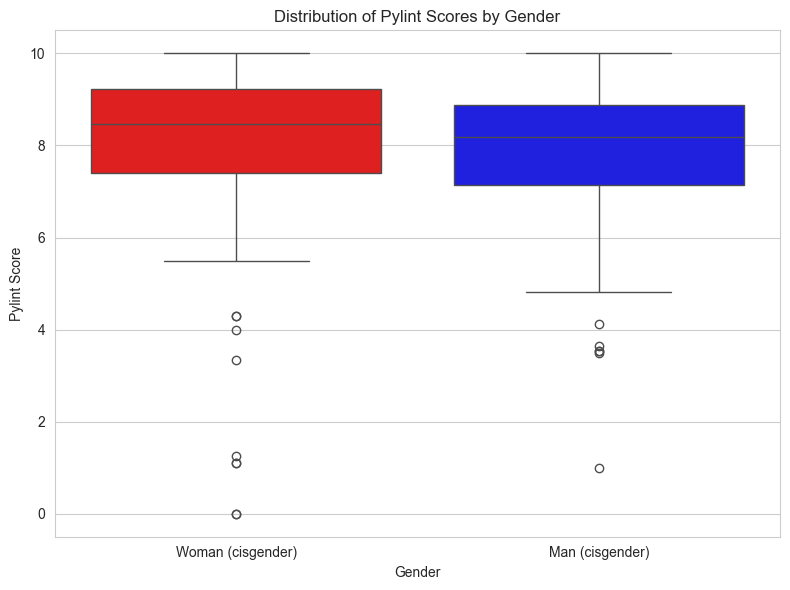

/var/folders/w6/f5trsq6n2jx87f1mqgd_4vv80000gn/T/ipykernel_28656/2673772357.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


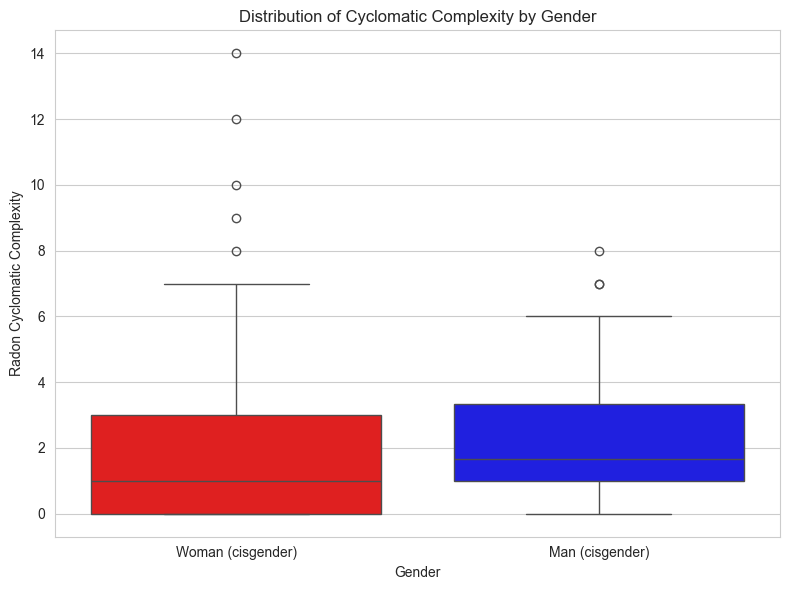

/var/folders/w6/f5trsq6n2jx87f1mqgd_4vv80000gn/T/ipykernel_28656/2673772357.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


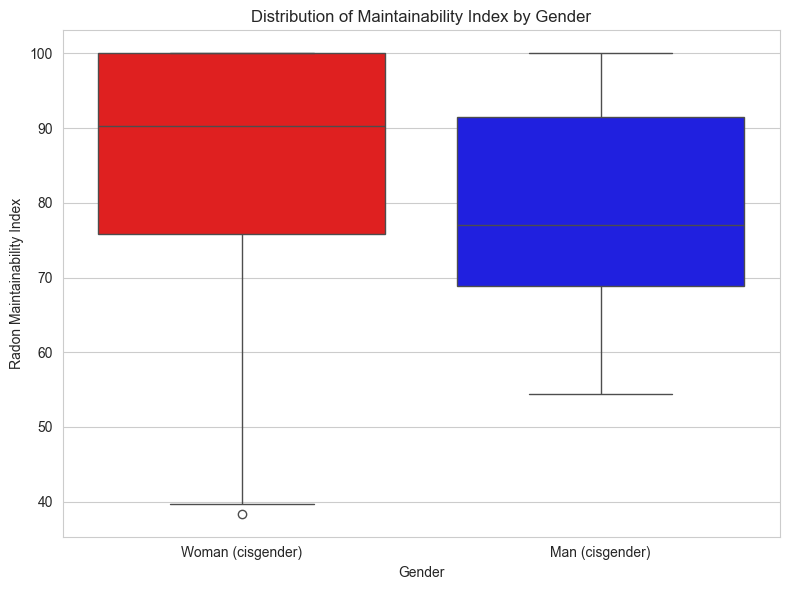

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot 1: Pylint Score by Gender
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.boxplot(
    data=code_blocks,
    x='gender',
    y='pylint_score',
    palette={'Woman (cisgender)':'red', 'Man (cisgender)':'blue'}
)
plt.xlabel('Gender')
plt.ylabel('Pylint Score')
plt.title('Distribution of Pylint Scores by Gender')
plt.tight_layout()
plt.show()

# Boxplot 2: Radon Cyclomatic Complexity by Gender
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.boxplot(
    data=code_blocks,
    x='gender',
    y='radon_complexity',
    palette={'Woman (cisgender)':'red', 'Man (cisgender)':'blue'}
)
plt.xlabel('Gender')
plt.ylabel('Radon Cyclomatic Complexity')
plt.title('Distribution of Cyclomatic Complexity by Gender')
plt.tight_layout()
plt.show()

# Boxplot 3: Radon Maintainability Index by Gender
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.boxplot(
    data=code_blocks,
    x='gender',
    y='radon_maintainability_index',
    palette={'Woman (cisgender)':'red', 'Man (cisgender)':'blue'}
)
plt.xlabel('Gender')
plt.ylabel('Radon Maintainability Index')
plt.title('Distribution of Maintainability Index by Gender')
plt.tight_layout()
plt.show()

### averaged per user

/var/folders/w6/f5trsq6n2jx87f1mqgd_4vv80000gn/T/ipykernel_28656/1851267304.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/w6/f5trsq6n2jx87f1mqgd_4vv80000gn/T/ipykernel_28656/1851267304.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/w6/f5trsq6n2jx87f1mqgd_4vv80000gn/T/ipykernel_28656/1851267304.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/w6/f5trsq6n2jx87f1mqgd_4vv80000gn/T/ipykernel_28656/1851267304.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

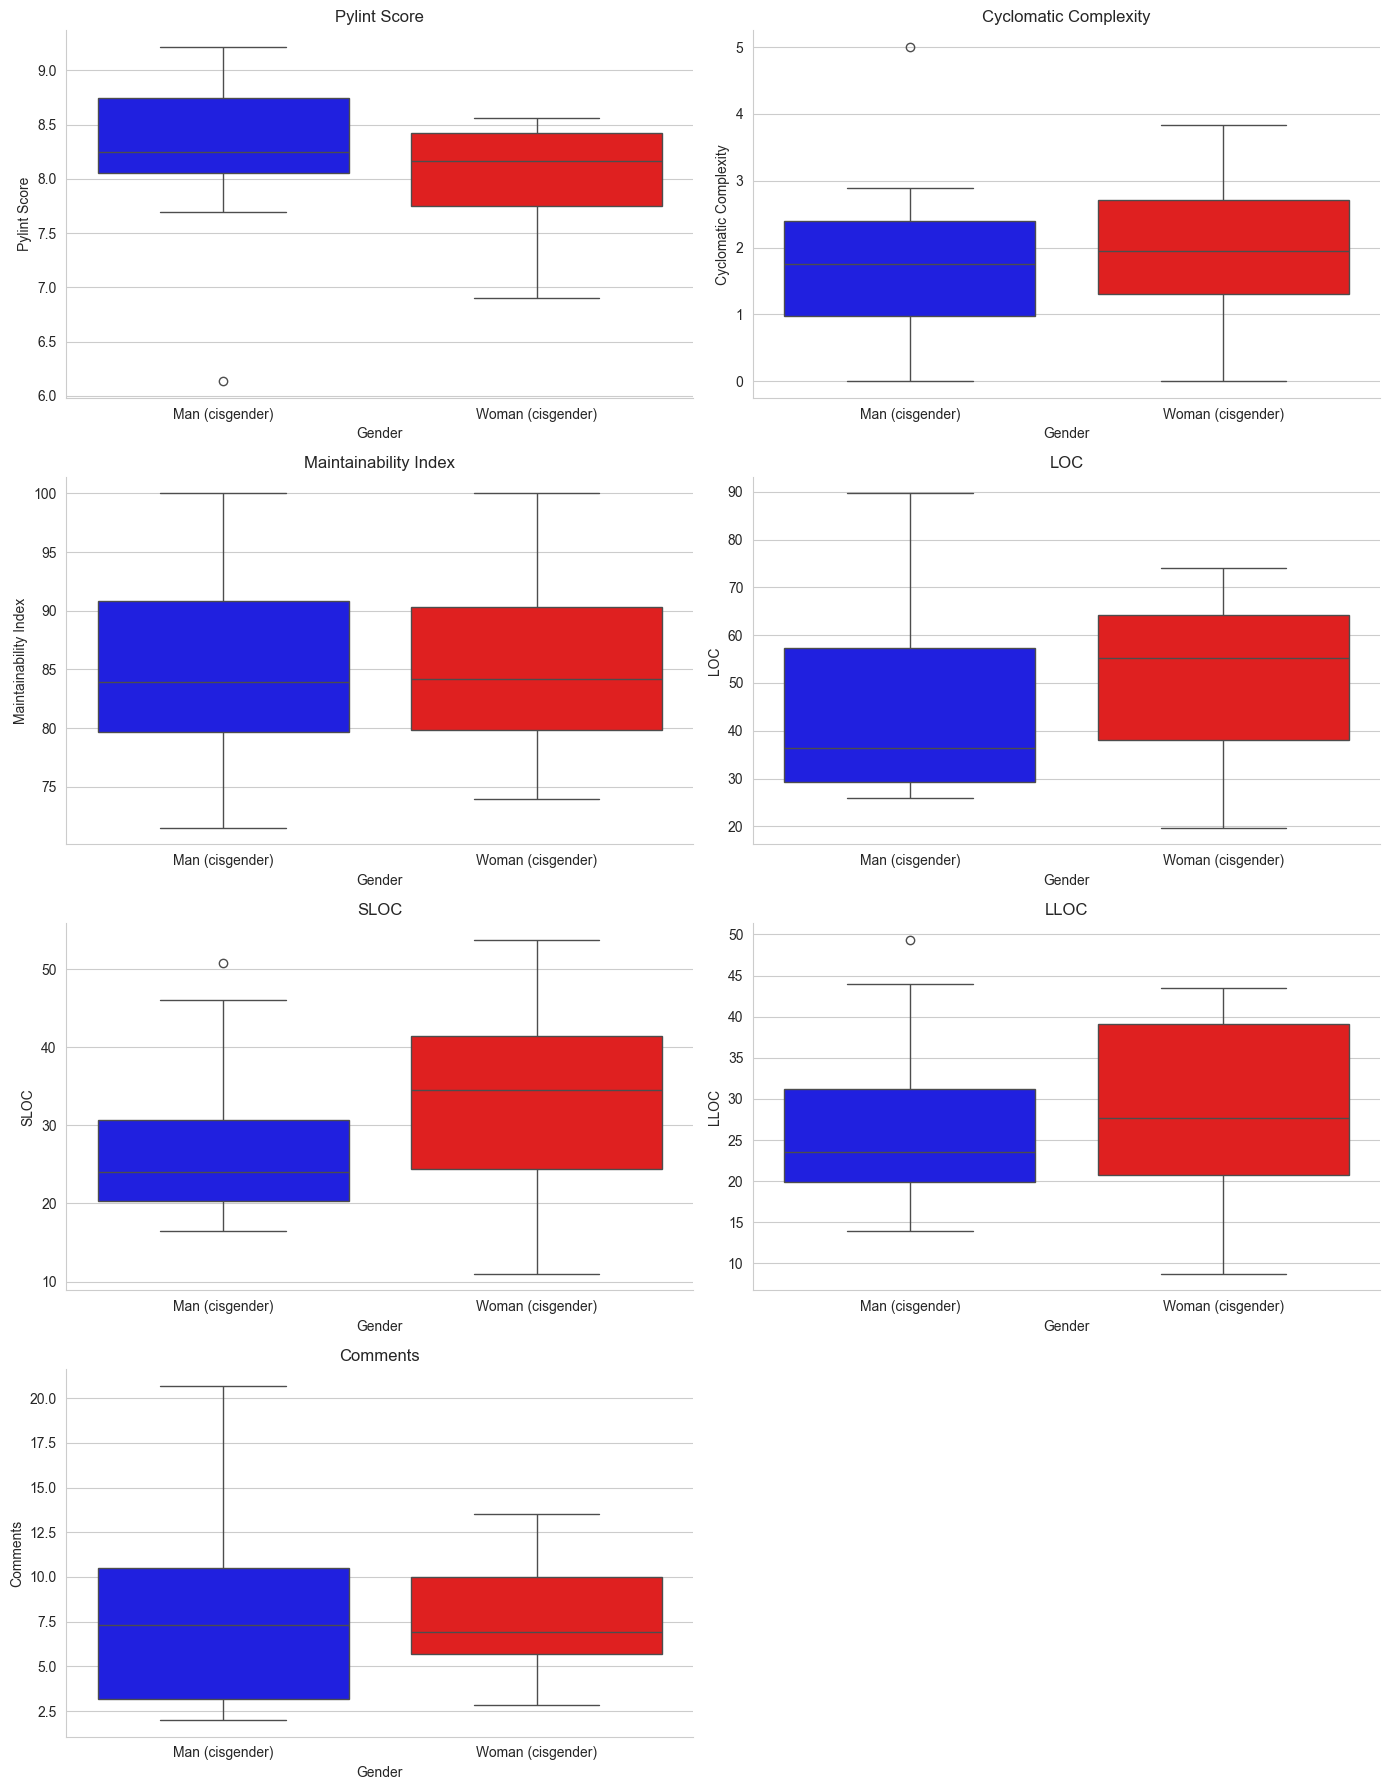

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_test = [
    'avg_pylint_score', 'avg_radon_complexity', 'avg_radon_maintainability_index',
    'avg_radon_loc', 'avg_radon_sloc', 'avg_radon_lloc', 'avg_radon_comments'
]
pretty_labels = [
    'Pylint Score', 'Cyclomatic Complexity', 'Maintainability Index',
    'LOC', 'SLOC', 'LLOC', 'Comments'
]

palette = {'Woman (cisgender)': 'red', 'Man (cisgender)': 'blue'}

fig, axs = plt.subplots(4, 2, figsize=(14, 18))
axs = axs.flatten()

for i, (col, label) in enumerate(zip(columns_to_test, pretty_labels)):
    sns.boxplot(
        data=user_avg_scores,
        x='gender',
        y=col,
        ax=axs[i],
        palette=palette
    )
    axs[i].set_title(label)
    axs[i].set_xlabel('Gender')
    axs[i].set_ylabel(label)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)

# Hide the seventh (empty) plot
if len(axs) > len(columns_to_test):
    axs[-1].axis('off')

plt.tight_layout()
plt.show()

/var/folders/w6/f5trsq6n2jx87f1mqgd_4vv80000gn/T/ipykernel_2335/833142090.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


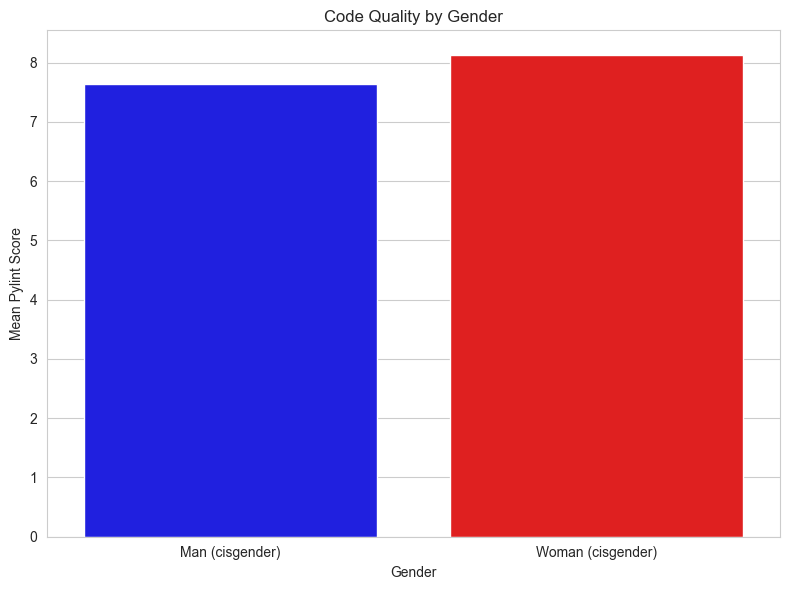

/var/folders/w6/f5trsq6n2jx87f1mqgd_4vv80000gn/T/ipykernel_2335/833142090.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


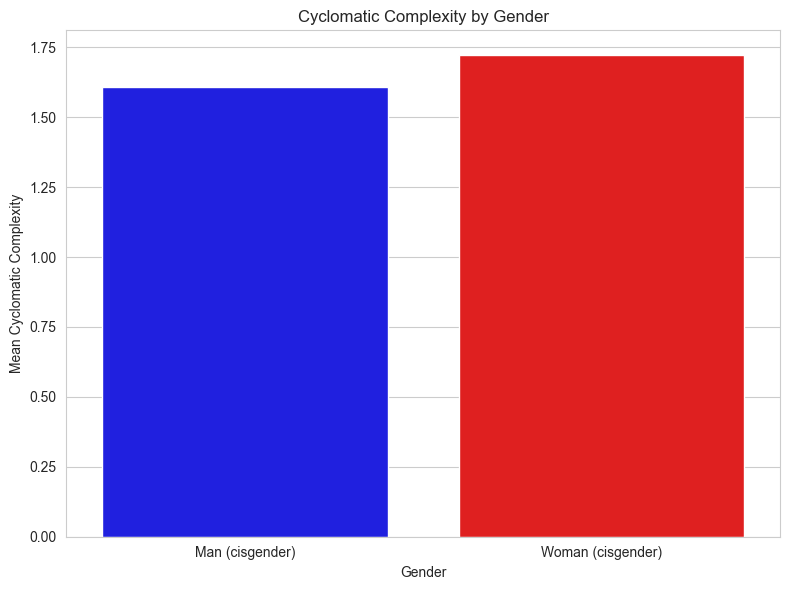

/var/folders/w6/f5trsq6n2jx87f1mqgd_4vv80000gn/T/ipykernel_2335/833142090.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


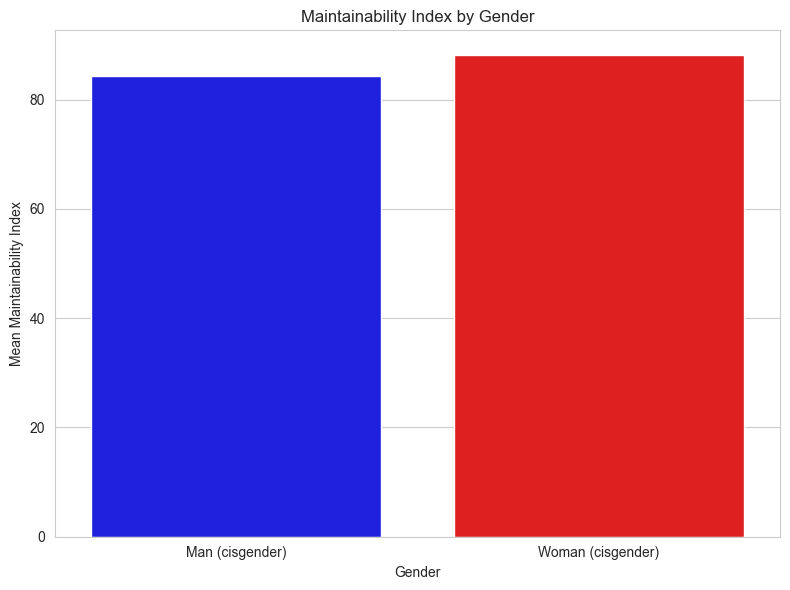

Man (cisgender): 37
Woman (cisgender): 107
                Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    pylint_score
No. Observations:      141        Method:                REML        
No. Groups:            13         Scale:                 3.7390      
Min. group size:       1          Log-Likelihood:        -297.7450   
Max. group size:       34         Converged:             Yes         
Mean group size:       10.8                                          
---------------------------------------------------------------------
                            Coef. Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------
Intercept                   7.419    0.499 14.866 0.000  6.440  8.397
gender[T.Woman (cisgender)] 0.701    0.610  1.149 0.251 -0.495  1.897
Group Var                   0.589    0.227                           



In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf


df_gpt4o = code_blocks[code_blocks['llm_version_normalized'] == "GPT-4o (all)"].reset_index()

# ---- 1. Pylint Score ----

user_avg = (
    df_gpt4o.groupby(['user_id', 'gender'])['pylint_score']
    .mean()
    .reset_index()
)

plot_df = (
    user_avg.groupby(['gender'])['pylint_score']
    .mean()
    .reset_index()
)

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.barplot(
    data=plot_df,
    x='gender',
    y='pylint_score',
    palette={'Woman (cisgender)':'red', 'Man (cisgender)':'blue'}
)
plt.xlabel('Gender')
plt.ylabel('Mean Pylint Score')
plt.title('Code Quality by Gender')
plt.tight_layout()
plt.show()

# ---- 2. Radon Cyclomatic Complexity ----

user_avg_complexity = (
    df_gpt4o.groupby(['user_id', 'gender'])['radon_complexity']
    .mean()
    .reset_index()
)

plot_df_complexity = (
    user_avg_complexity.groupby(['gender'])['radon_complexity']
    .mean()
    .reset_index()
)

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.barplot(
    data=plot_df_complexity,
    x='gender',
    y='radon_complexity',
    palette={'Woman (cisgender)':'red', 'Man (cisgender)':'blue'}
)
plt.xlabel('Gender')
plt.ylabel('Mean Cyclomatic Complexity')
plt.title('Cyclomatic Complexity by Gender')
plt.tight_layout()
plt.show()

# ---- 3. Radon Maintainability Index ----

user_avg_mi = (
    df_gpt4o.groupby(['user_id', 'gender'])['radon_maintainability_index']
    .mean()
    .reset_index()
)

plot_df_mi = (
    user_avg_mi.groupby(['gender'])['radon_maintainability_index']
    .mean()
    .reset_index()
)

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.barplot(
    data=plot_df_mi,
    x='gender',
    y='radon_maintainability_index',
    palette={'Woman (cisgender)':'red', 'Man (cisgender)':'blue'}
)
plt.xlabel('Gender')
plt.ylabel('Mean Maintainability Index')
plt.title('Maintainability Index by Gender')
plt.tight_layout()
plt.show()

# ---- Optional: Distribution summary ----
summary = df_gpt4o.groupby(['gender']).size()
for gender, count in summary.items():
    print(f"{gender}: {count}")


df_tmp = df_gpt4o.dropna(subset=["pylint_score", "gender", "user_id"])

model = smf.mixedlm("pylint_score ~ gender", data=df_tmp, groups=df_tmp["user_id"])
result = model.fit()
print(result.summary())
